# fMRT Zeitserie anschauen

### module importieren

In [23]:
from nilearn import image, input_data, plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dateiname des funktionellen Bildes

In [2]:
epi_file = '../data/sub-01_task-imagery_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'

In [3]:
epi_file

'../data/sub-01_task-imagery_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'

### Maske definieren

In [ ]:
masker = input_data.NiftiMasker(mask_img='../external/MNI152_T1_2mm_brain_mask.nii.gz').fit()

In [ ]:
epi_mean = image.mean_img(epi_file)
plotting.plot_roi(masker.mask_img_,bg_img=epi_mean,display_mode='x',cut_coords=range(-40,41,20));

### Voxelwerte auslesen

In [ ]:
epi_data = masker.transform(epi_file)

In [7]:
epi_data.shape

(203, 228483)

In [8]:
epi_data

array([[579.60834587, 567.19547691, 439.22117818, ..., 386.54146511,
        330.15497916, 300.36419922],
       [574.7283294 , 567.18979905, 444.54588894, ..., 399.38209329,
        349.18622873, 317.165758  ],
       [577.47566156, 566.0751717 , 440.43522999, ..., 410.23027015,
        351.80207538, 316.74161875],
       ...,
       [567.12021166, 568.2372987 , 449.08109359, ..., 396.71691764,
        334.92175549, 312.49760328],
       [562.35270568, 564.34777178, 445.98103175, ..., 399.25469918,
        331.99332421, 313.77418152],
       [591.8079972 , 585.33013069, 451.564339  , ..., 397.27843992,
        332.79339452, 303.02836509]])

### In Tabelle umwandeln

In [9]:
epi_df = pd.DataFrame(epi_data)

In [10]:
epi_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
198,579.118852,579.952977,459.866853,509.525630,465.435449,391.265048,381.549026,275.851948,383.232015,275.609727,...,410.041335,378.557750,479.155373,462.340215,367.781065,287.567494,415.055617,397.903468,332.726685,300.808024
199,571.674551,565.612686,440.087927,497.942046,448.821643,373.756161,366.575505,262.396909,374.195361,262.186766,...,417.316585,382.990308,471.556981,452.434503,357.339781,279.251554,408.366665,392.298277,329.653492,298.002439
200,567.120212,568.237299,449.081094,497.569266,455.488422,379.779759,376.918345,278.445300,382.495392,273.932406,...,416.546013,378.613842,458.189545,446.806828,360.944486,287.580686,410.890763,396.716918,334.921755,312.497603
201,562.352706,564.347772,445.981032,495.943032,454.545244,381.031156,377.056002,279.896382,383.317552,269.845510,...,421.394715,393.102585,466.152024,449.590036,356.150173,279.994340,415.082550,399.254699,331.993324,313.774182
202,591.807997,585.330131,451.564339,517.031888,476.233242,363.269488,364.557544,271.433311,382.036453,261.495310,...,421.869458,393.243049,479.502023,459.611722,357.201679,272.331280,410.907515,397.278440,332.793395,303.028365


### Visualisierung eines Volumens (Raum)

In [11]:
my_volumes = [10,100]

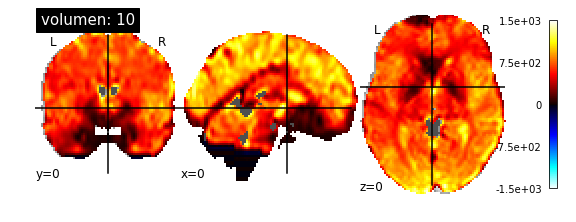

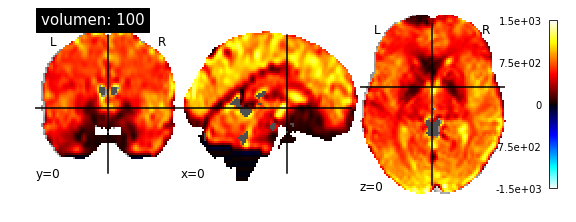

In [24]:
for vol in my_volumes:
    
    this_img = masker.inverse_transform(epi_df.loc[[vol],:])
    
    plotting.plot_stat_map(this_img,
                           vmax=1500,
                           cut_coords=(0,0,0),
                           title='volumen: %s'%vol)
    plt.show()

### Visualisierung eines Voxels (Zeit)

#### Voxel individuell

In [13]:
my_voxels = [100,1000,10000]

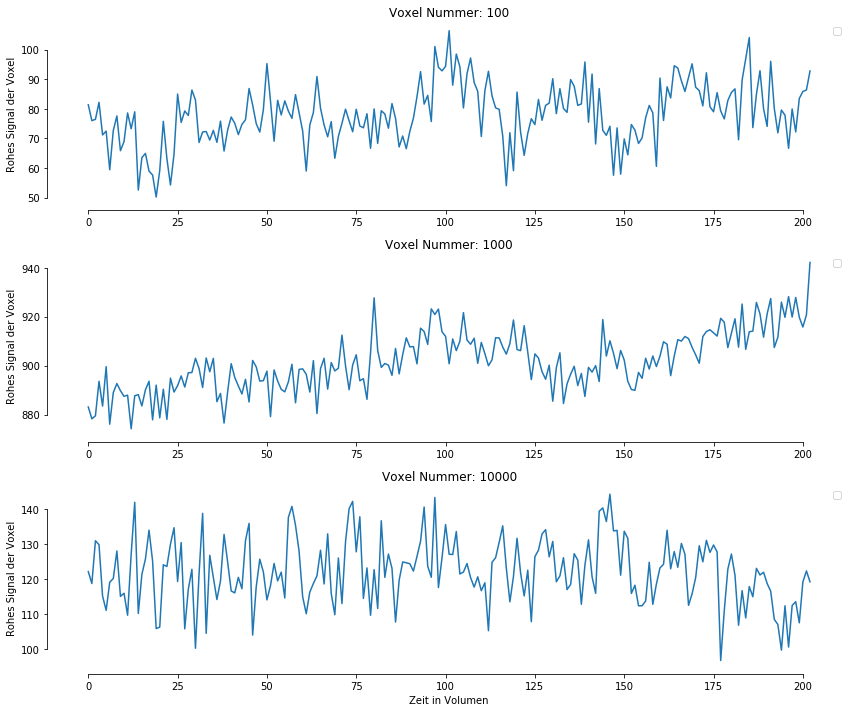

In [14]:
fig = plt.figure(figsize=(12,10))
for i,vox in enumerate(my_voxels):
    this_timecourse = epi_df.loc[:,[vox]]
    ax = plt.subplot(311+i)
    sns.lineplot(data=this_timecourse,ax=ax)
    sns.despine(trim=True,offset=5)
    ax.set_ylabel('Rohes Signal der Voxel')
    ax.legend([])
    ax.set_title('Voxel Nummer: %s'%vox)
ax.set_xlabel('Zeit in Volumen')
plt.tight_layout()
plt.show()

#### Voxel gemeinsam

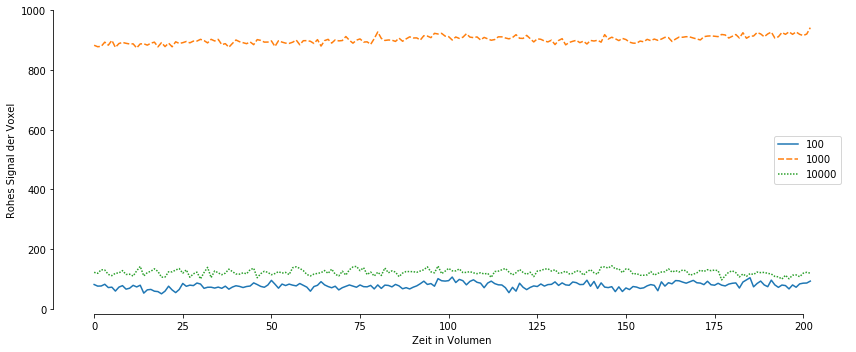

In [15]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
this_timecourse = epi_df.loc[:,my_voxels]
sns.lineplot(data=this_timecourse,ax=ax)
ax.set_ylabel('Rohes Signal der Voxel')
ax.set_xlabel('Zeit in Volumen')
plt.ylim(0,1000)
sns.despine(trim=True,offset=5)
plt.tight_layout()
plt.show()

### Mittelwert des Zeitverlaufs jedes Voxels auf Null setzen

Mittelwert für jedes Voxels über die Zeit berechnen

In [16]:
voxel_timeseries_means = epi_df.mean(axis=0)

In [17]:
voxel_timeseries_means

0         580.661781
1         578.359438
2         456.466705
3         511.302584
4         468.366047
5         361.510204
6         356.152606
7         259.613664
8         360.845479
9         278.035093
10        426.528551
11        508.368519
12        491.844968
13        409.546570
14        295.594486
15        179.057454
16        158.388787
17        309.490145
18        496.723038
19        576.271553
20        512.598465
21        378.445239
22        242.659566
23        139.682950
24         94.280991
25        242.251501
26        330.942422
27        533.298284
28        747.186613
29        837.429614
             ...    
228453     45.978960
228454     67.851664
228455    154.771594
228456    266.391372
228457    350.293823
228458    523.001236
228459    544.793559
228460    209.727232
228461    204.138394
228462    207.529662
228463    221.279650
228464    252.235801
228465    432.100334
228466    420.802960
228467    421.800237
228468    370.847404
228469    372

Mittelwert jedes Voxels auf Null setzen indem der Mittelwert abgezogen wird

In [18]:
epi_df_zero_mean = epi_df - voxel_timeseries_means

In [19]:
epi_df_zero_mean.tail()

,0,1,2,3,4,5,6,7,8,9,...,228473,228474,228475,228476,228477,228478,228479,228480,228481,228482
198,-1.542929,1.593539,3.400148,-1.776953,-2.930598,29.754844,25.396420,16.238284,22.386536,-2.425366,...,-1.181273,-1.565878,12.694104,7.159200,-0.410276,-5.382962,4.884167,-1.975834,-9.649877,-5.775349
199,-8.987230,-12.746752,-16.378778,-13.360538,-19.544404,12.245957,10.422899,2.783245,13.349882,-15.848327,...,6.093977,2.866680,5.095712,-2.746512,-10.851560,-13.698902,-1.804785,-7.581025,-12.723070,-8.580934
200,-13.541569,-10.122139,-7.385611,-13.733318,-12.877625,18.269555,20.765740,18.831636,21.649914,-4.102686,...,5.323405,-1.509786,-8.271724,-8.374187,-7.246855,-5.369770,0.719313,-3.162384,-7.454806,5.914230
201,-18.309075,-14.011666,-10.485673,-15.359552,-13.820803,19.520952,20.903396,20.282717,22.472073,-8.189583,...,10.172107,12.978957,-0.309245,-5.590979,-12.041168,-12.956116,4.911100,-0.624602,-10.383238,7.190808
202,11.146216,6.970693,-4.902366,5.729304,7.867195,1.759284,8.404938,11.819647,21.190975,-16.539783,...,10.646850,13.119421,13.040755,4.430707,-10.989662,-20.619176,0.736065,-2.600862,-9.583167,-3.555008


Check ob das geklappt hat:

In [20]:
 epi_df_zero_mean.mean(axis=0).round(2)

0         0.0
1        -0.0
2        -0.0
3        -0.0
4        -0.0
5         0.0
6         0.0
7        -0.0
8        -0.0
9        -0.0
10       -0.0
11       -0.0
12        0.0
13       -0.0
14       -0.0
15        0.0
16       -0.0
17       -0.0
18       -0.0
19       -0.0
20       -0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26       -0.0
27       -0.0
28       -0.0
29       -0.0
         ... 
228453    0.0
228454   -0.0
228455    0.0
228456   -0.0
228457    0.0
228458   -0.0
228459   -0.0
228460    0.0
228461   -0.0
228462    0.0
228463   -0.0
228464   -0.0
228465   -0.0
228466    0.0
228467    0.0
228468   -0.0
228469    0.0
228470    0.0
228471   -0.0
228472    0.0
228473   -0.0
228474   -0.0
228475   -0.0
228476    0.0
228477    0.0
228478   -0.0
228479    0.0
228480    0.0
228481   -0.0
228482    0.0
Length: 228483, dtype: float64

### Visualisierung der Volumen im Raum

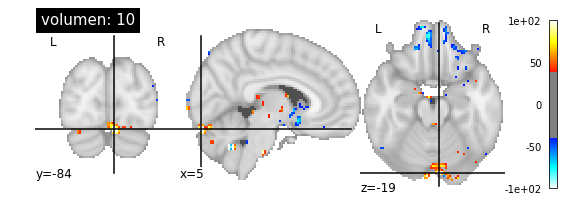

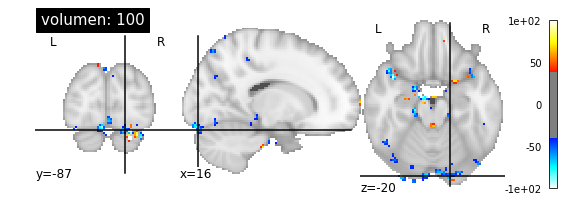

In [21]:
for vol in my_volumes:
    
    this_img = masker.inverse_transform(epi_df_zero_mean.loc[[vol],:])
    
    plotting.plot_stat_map(this_img,
                           vmax=100,
                           threshold=40,
                           title='volumen: %s'%vol)
    plt.show()

### Visualisierung der Voxel über die Zeit

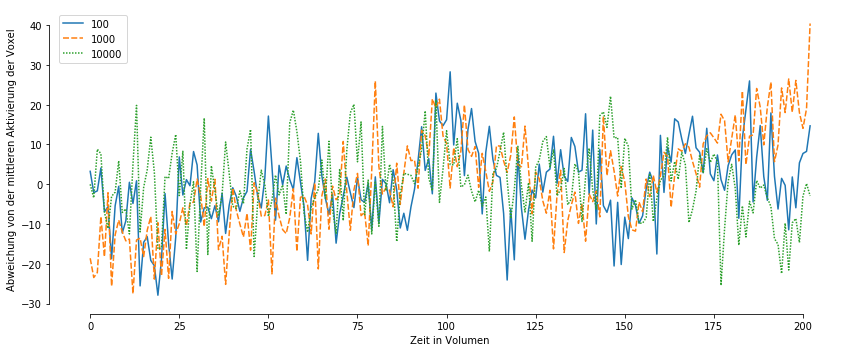

In [22]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
this_timecourse = epi_df_zero_mean.loc[:,my_voxels]
sns.lineplot(data=this_timecourse,ax=ax)
sns.despine(trim=True,offset=5)
ax.set_ylabel('Abweichung von der mittleren Aktivierung der Voxel')
ax.set_xlabel('Zeit in Volumen')
plt.tight_layout()
plt.show()